## Setup Drive and Data Folder

In [1]:

#! pip3 install auto-sklearn

In [2]:
import os
os.chdir('..')

In [3]:
import pandas as pd
import os
import numpy as np
RNDSEED = np.random.seed(39)
PRECISION = 4 # 3 of digits to keep after the decimal point
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, cohen_kappa_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
RUNNING_ON_COLAB = False # we assume running on CoLab! Change to False if running locally.

*italicized text*

In [4]:
## mount gdrive
#from google.colab import drive#
#drive.mount("/content/gdrive")

In [5]:
# If running locally, define current working path
path = os.getcwd()

# If Google colab
if RUNNING_ON_COLAB:
    path = "/content/gdrive/My Drive/Colab Notebooks/RandomForest_FeatureData"

print(path)

# define current data path. This is after we did classification. We have done some
# cleaning already.
data_path = path + '/fl_testbed/version2/data/initial'
print(data_path)
#/home/jose/FL_AM_Defect-Detection
#/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial

/home/jose/FL_AM_Defect-Detection
/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial


## Play code

<font color=cyan>The key is to transform the time column! </font>


In [6]:
!cd '/home/jose/FL_AM_Defect-Detection/notebooks/fl_testbed/version2/data/initial' && ls

/bin/bash: line 0: cd: /home/jose/FL_AM_Defect-Detection/notebooks/fl_testbed/version2/data/initial: No such file or directory


In [7]:
## start - play code
print(data_path)
csv_file = data_path + '/combined_offset_misalignment.csv'
df_temp = pd.read_csv(csv_file, chunksize=50000) 
df = pd.concat(df_temp, ignore_index=True)

/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial


In [8]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'wf_start_time',
       'Probe_1_AxialDirection_CrestFactor_g~g',
       'Probe_1_AxialDirection_DerivedPeak_g',
       'Probe_1_AxialDirection_Peak~Peak_g', 'Probe_1_AxialDirection_RMS_g',
       'Probe_1_AxialDirection_TruePeak_g',
       'Probe_1_AxialDirection_HighFrequency_grms',
       'Probe_1_AxialDirection_Kurtosis_g~g',
       'Probe_2_RadialVertical_CrestFactor_g~g',
       'Probe_2_RadialVertical_DerivedPeak_g',
       'Probe_2_RadialVertical_Peak~Peak_g', 'Probe_2_RadialVertical_RMS_g',
       'Probe_2_RadialVertical_TruePeak_g',
       'Probe_2_RadialVertical_HighFrequency_grms',
       'Probe_2_RadialVertical_Kurtosis_g~g',
       'Probe_3_RadialHorizontal_CrestFactor_g~g',
       'Probe_3_RadialHorizontal_DerivedPeak_g',
       'Probe_3_RadialHorizontal_Peak~Peak_g',
       'Probe_3_RadialHorizontal_RMS_g', 'Probe_3_RadialHorizontal_TruePeak_g',
       'Probe_3_RadialHorizontal_HighFrequency_grms',
       'Probe_3_RadialHorizontal_Ku

In [9]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,wf_start_time,Probe_1_AxialDirection_CrestFactor_g~g,Probe_1_AxialDirection_DerivedPeak_g,Probe_1_AxialDirection_Peak~Peak_g,Probe_1_AxialDirection_RMS_g,Probe_1_AxialDirection_TruePeak_g,Probe_1_AxialDirection_HighFrequency_grms,Probe_1_AxialDirection_Kurtosis_g~g,...,Probe_6_BearingRadial_Peak~Peak_g,Probe_6_BearingRadial_RMS_g,Probe_6_BearingRadial_TruePeak_g,Probe_6_BearingRadial_HighFrequency_grms,Probe_6_BearingRadial_Kurtosis_g~g,Thermocouple 1_Value,Thermocouple 2_Value,Thermocouple 3_Value,Thermocouple 4_Value,status
0,0,0,2022-08-30T19:17:41.000007,2.9679,0.1485,0.6232,0.1050,0.3116,0.0303,2.3544,...,0.1273,0.0166,0.0687,0.0074,3.1289,72.5799,72.4725,72.5867,73.0246,6.25mm_Offset
1,1,1,2022-08-30T19:17:42.000007,3.0104,0.1511,0.6261,0.1069,0.3217,0.0310,2.3787,...,0.1120,0.0162,0.0618,0.0076,2.9855,72.5552,72.4137,72.5893,73.0349,6.25mm_Offset
2,2,2,2022-08-30T19:17:43.000007,3.2165,0.1611,0.6889,0.1139,0.3664,0.0309,2.3040,...,0.1187,0.0160,0.0595,0.0074,3.2605,72.5661,72.4391,72.5610,73.0723,6.25mm_Offset
3,3,3,2022-08-30T19:17:44.000007,3.1404,0.1388,0.6156,0.0981,0.3081,0.0309,2.4416,...,0.1444,0.0163,0.0867,0.0075,3.7580,72.5788,72.4654,72.5600,73.0508,6.25mm_Offset
4,4,4,2022-08-30T19:17:45.000007,3.4300,0.1520,0.6706,0.1075,0.3686,0.0302,2.3783,...,0.1208,0.0160,0.0680,0.0074,3.1019,72.5864,72.4441,72.5711,73.0678,6.25mm_Offset


In [10]:
# drop Unnamed columns
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]


In [11]:
# Let's find the youngest & oldest timestamp

df['wf_start_time'] = pd.to_datetime(df['wf_start_time']) # make sure it is datetime

youngest = min(df.wf_start_time)
oldest = max(df.wf_start_time)
print(youngest)
print(oldest)
span = oldest - youngest
print(span)
print(span.total_seconds())

## Using Oldest - current to determine the RUL
df['rul'] = df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())

2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0


In [12]:
df.head(5)

,wf_start_time,Probe_1_AxialDirection_CrestFactor_g~g,Probe_1_AxialDirection_DerivedPeak_g,Probe_1_AxialDirection_Peak~Peak_g,Probe_1_AxialDirection_RMS_g,Probe_1_AxialDirection_TruePeak_g,Probe_1_AxialDirection_HighFrequency_grms,Probe_1_AxialDirection_Kurtosis_g~g,Probe_2_RadialVertical_CrestFactor_g~g,Probe_2_RadialVertical_DerivedPeak_g,...,Probe_6_BearingRadial_RMS_g,Probe_6_BearingRadial_TruePeak_g,Probe_6_BearingRadial_HighFrequency_grms,Probe_6_BearingRadial_Kurtosis_g~g,Thermocouple 1_Value,Thermocouple 2_Value,Thermocouple 3_Value,Thermocouple 4_Value,status,rul
0,2022-08-30 19:17:41.000007,2.9679,0.1485,0.6232,0.1050,0.3116,0.0303,2.3544,3.0998,0.4020,...,0.0166,0.0687,0.0074,3.1289,72.5799,72.4725,72.5867,73.0246,6.25mm_Offset,176049.0
1,2022-08-30 19:17:42.000007,3.0104,0.1511,0.6261,0.1069,0.3217,0.0310,2.3787,3.0161,0.4009,...,0.0162,0.0618,0.0076,2.9855,72.5552,72.4137,72.5893,73.0349,6.25mm_Offset,176048.0
2,2022-08-30 19:17:43.000007,3.2165,0.1611,0.6889,0.1139,0.3664,0.0309,2.3040,3.2447,0.4001,...,0.0160,0.0595,0.0074,3.2605,72.5661,72.4391,72.5610,73.0723,6.25mm_Offset,176047.0
3,2022-08-30 19:17:44.000007,3.1404,0.1388,0.6156,0.0981,0.3081,0.0309,2.4416,3.1142,0.4004,...,0.0163,0.0867,0.0075,3.7580,72.5788,72.4654,72.5600,73.0508,6.25mm_Offset,176046.0
4,2022-08-30 19:17:45.000007,3.4300,0.1520,0.6706,0.1075,0.3686,0.0302,2.3783,3.1580,0.4001,...,0.0160,0.0680,0.0074,3.1019,72.5864,72.4441,72.5711,73.0678,6.25mm_Offset,176045.0


In [13]:
df.columns

Index(['wf_start_time', 'Probe_1_AxialDirection_CrestFactor_g~g',
       'Probe_1_AxialDirection_DerivedPeak_g',
       'Probe_1_AxialDirection_Peak~Peak_g', 'Probe_1_AxialDirection_RMS_g',
       'Probe_1_AxialDirection_TruePeak_g',
       'Probe_1_AxialDirection_HighFrequency_grms',
       'Probe_1_AxialDirection_Kurtosis_g~g',
       'Probe_2_RadialVertical_CrestFactor_g~g',
       'Probe_2_RadialVertical_DerivedPeak_g',
       'Probe_2_RadialVertical_Peak~Peak_g', 'Probe_2_RadialVertical_RMS_g',
       'Probe_2_RadialVertical_TruePeak_g',
       'Probe_2_RadialVertical_HighFrequency_grms',
       'Probe_2_RadialVertical_Kurtosis_g~g',
       'Probe_3_RadialHorizontal_CrestFactor_g~g',
       'Probe_3_RadialHorizontal_DerivedPeak_g',
       'Probe_3_RadialHorizontal_Peak~Peak_g',
       'Probe_3_RadialHorizontal_RMS_g', 'Probe_3_RadialHorizontal_TruePeak_g',
       'Probe_3_RadialHorizontal_HighFrequency_grms',
       'Probe_3_RadialHorizontal_Kurtosis_g~g',
       'Probe_4_RadialVe

In [14]:
# save back
df.to_csv(csv_file)

## saved more than 50% space!

In [15]:
csv_file

'/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial/combined_offset_misalignment.csv'

In [16]:
os.path.basename(os.path.dirname(csv_file))

'initial'

In [17]:
## end - play code

## Util - add RUL column

In [18]:
csv_file = data_path + '/combined_offset_misalignment.csv'
df_temp = pd.read_csv(csv_file, chunksize=50000) 
df = pd.concat(df_temp, ignore_index=True)

In [19]:
# Let's find the youngest & oldest timestamp

df['wf_start_time'] = pd.to_datetime(df['wf_start_time']) # make sure it is datetime

youngest = min(df.wf_start_time)
oldest = max(df.wf_start_time)
print(youngest)
print(oldest)
span = oldest - youngest
print(span)
print(span.total_seconds())

## Using Oldest - current to determine the RUL
df['rul'] = df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())

2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0


In [31]:
# save back with RUL
df.to_csv(data_path + '/combined_offset_misalignment_with_RUL.csv')


## RF Regression

In [32]:
## Common imports
import pandas as pd
import numpy as np
import csv
import os

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, cohen_kappa_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
# from pandas_ml import ConfusionMatrix

import matplotlib
import matplotlib.pyplot as plt
plt.style.available
%matplotlib inline

# to make this notebook's output stable across runs
RNDSEED = np.random.seed(39)

### Exploring the data a bit & prep the df

In [33]:
## future, let's read the file
csv_file = data_path + '/combined_offset_misalignment_with_RUL.csv'
df_temp = pd.read_csv(csv_file, chunksize=50000) 
big_df = pd.concat(df_temp)

In [34]:
df = big_df # reset 

# drop unwanted cols
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))] # drop Unnamed
df = df[df.columns.drop(list(df.filter(regex='wf_start_time')))] # drop time column
df = df[df.columns.drop(list(df.filter(regex='status')))] # drop status column



In [35]:
df.shape

(238722, 47)

In [36]:
df.columns

Index(['Probe_1_AxialDirection_CrestFactor_g~g',
       'Probe_1_AxialDirection_DerivedPeak_g',
       'Probe_1_AxialDirection_Peak~Peak_g', 'Probe_1_AxialDirection_RMS_g',
       'Probe_1_AxialDirection_TruePeak_g',
       'Probe_1_AxialDirection_HighFrequency_grms',
       'Probe_1_AxialDirection_Kurtosis_g~g',
       'Probe_2_RadialVertical_CrestFactor_g~g',
       'Probe_2_RadialVertical_DerivedPeak_g',
       'Probe_2_RadialVertical_Peak~Peak_g', 'Probe_2_RadialVertical_RMS_g',
       'Probe_2_RadialVertical_TruePeak_g',
       'Probe_2_RadialVertical_HighFrequency_grms',
       'Probe_2_RadialVertical_Kurtosis_g~g',
       'Probe_3_RadialHorizontal_CrestFactor_g~g',
       'Probe_3_RadialHorizontal_DerivedPeak_g',
       'Probe_3_RadialHorizontal_Peak~Peak_g',
       'Probe_3_RadialHorizontal_RMS_g', 'Probe_3_RadialHorizontal_TruePeak_g',
       'Probe_3_RadialHorizontal_HighFrequency_grms',
       'Probe_3_RadialHorizontal_Kurtosis_g~g',
       'Probe_4_RadialVertical_CrestFacto

### RF works

In [37]:
# Get X & y
# Naming convention: X as predictors; y as response.
from sklearn.model_selection import train_test_split

y = df['rul'] # pop response
X = df.drop('rul',axis = 1) # drop response

print (X.shape)
print (X.columns)

(238722, 46)
Index(['Probe_1_AxialDirection_CrestFactor_g~g',
       'Probe_1_AxialDirection_DerivedPeak_g',
       'Probe_1_AxialDirection_Peak~Peak_g', 'Probe_1_AxialDirection_RMS_g',
       'Probe_1_AxialDirection_TruePeak_g',
       'Probe_1_AxialDirection_HighFrequency_grms',
       'Probe_1_AxialDirection_Kurtosis_g~g',
       'Probe_2_RadialVertical_CrestFactor_g~g',
       'Probe_2_RadialVertical_DerivedPeak_g',
       'Probe_2_RadialVertical_Peak~Peak_g', 'Probe_2_RadialVertical_RMS_g',
       'Probe_2_RadialVertical_TruePeak_g',
       'Probe_2_RadialVertical_HighFrequency_grms',
       'Probe_2_RadialVertical_Kurtosis_g~g',
       'Probe_3_RadialHorizontal_CrestFactor_g~g',
       'Probe_3_RadialHorizontal_DerivedPeak_g',
       'Probe_3_RadialHorizontal_Peak~Peak_g',
       'Probe_3_RadialHorizontal_RMS_g', 'Probe_3_RadialHorizontal_TruePeak_g',
       'Probe_3_RadialHorizontal_HighFrequency_grms',
       'Probe_3_RadialHorizontal_Kurtosis_g~g',
       'Probe_4_RadialVertic

In [38]:
## true orignal ones
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RNDSEED)

print(y_train.shape[0], y_test.shape[0])

179041 59681


In [39]:
y_test.shape

(59681,)

In [40]:
X_train.dtypes


Probe_1_AxialDirection_CrestFactor_g~g         float64
Probe_1_AxialDirection_DerivedPeak_g           float64
Probe_1_AxialDirection_Peak~Peak_g             float64
Probe_1_AxialDirection_RMS_g                   float64
Probe_1_AxialDirection_TruePeak_g              float64
Probe_1_AxialDirection_HighFrequency_grms      float64
Probe_1_AxialDirection_Kurtosis_g~g            float64
Probe_2_RadialVertical_CrestFactor_g~g         float64
Probe_2_RadialVertical_DerivedPeak_g           float64
Probe_2_RadialVertical_Peak~Peak_g             float64
Probe_2_RadialVertical_RMS_g                   float64
Probe_2_RadialVertical_TruePeak_g              float64
Probe_2_RadialVertical_HighFrequency_grms      float64
Probe_2_RadialVertical_Kurtosis_g~g            float64
Probe_3_RadialHorizontal_CrestFactor_g~g       float64
Probe_3_RadialHorizontal_DerivedPeak_g         float64
Probe_3_RadialHorizontal_Peak~Peak_g           float64
Probe_3_RadialHorizontal_RMS_g                 float64
Probe_3_Ra

In [41]:
y_train.dtypes


dtype('float64')

In [42]:
from sklearn.metrics import mean_squared_error

n_estimators = 10 # vary small one, done within 1 min;

def rf_regression ():
    rf = RandomForestRegressor(
    n_estimators=n_estimators,      
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    max_features='auto',
    random_state = RNDSEED
  )  
    rf.fit(X_train, y_train)
  
    return rf

rf = rf_regression()



/home/jose/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


KeyboardInterrupt: 

### Save/Load the model

In [20]:
## utility - save/load the model
import os
import joblib

# to save
joblib.dump(rf, data_path + '/random_forest_offset_RUL.joblib') 

# to load
rf = joblib.load(data_path + '/random_forest_offset_RUL.joblib')

### Evaluation

In [21]:
y_pred = rf.predict(X_test) ## using the untinted dataset!
    
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # np.sqrt

print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))

## with n_estimators = 150

# R^2: 0.9991654290573937
# Mean Absolute Error (MAE): 1158.6216816072117
# Mean Squared Error (MSE): 333818221.94037396
# Root Mean Squared Error (RMSE): 18270.692979205083
# Explained Variance Score: 0.9991654316522736
# Max Error: 1998236.0866666667
# Mean Squared Log Error: 0.012717975468372306
# Median Absolute Error: 147.4266666667536

## n_estimators = 10
# R^2: 0.9990822069686238
# Mean Absolute Error (MAE): 1213.5715068447246
# Mean Squared Error (MSE): 367106044.79767376
# Mean Absolute Percentage Error (MAPE): 1.0690696275079867e+17
# Root Mean Squared Error (RMSE): 19160.011607451437
# Explained Variance Score: 0.9990822141398445
# Max Error: 1998818.5
# Mean Squared Log Error: 0.012296657672986336
# Median Absolute Error: 137.60000000009313

R^2: 0.9990302599154065
Mean Absolute Error (MAE): 1276.152985037114
Mean Squared Error (MSE): 387884233.9901632
Mean Absolute Percentage Error (MAPE): 8.183710844734606e+16
Root Mean Squared Error (RMSE): 19694.776820014064
Explained Variance Score: 0.9990302634189621
Max Error: 1998799.2
Mean Squared Log Error: 0.013024348269610525
Median Absolute Error: 138.19999999995343


# Keras

In [63]:

from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation, Dense
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from datetime import datetime
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from autosklearn.regression import AutoSklearnRegressor
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
#!mkdir logs/fit/
!rm -rf logs/fit/*
# !sudo firewall-cmd  --add-port=8000/tcp

In [65]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10**-7 * 10**(epoch/3))

es=EarlyStopping(
    monitor="val_loss",

    patience=3,
    verbose=1,
    mode="auto",
    min_delta=0.001
)

# # checkpoint_filepath = "./tmp/checkpoint"

#scaler = MinMaxScaler()



In [57]:
%load_ext tensorboard
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# FULL DENSE

In [49]:

#TRAINING
tf.keras.backend.clear_session()

#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)


# define generator
n_features = 46


# model1.add(Dense(80), input_shape=(X_train.shape[1],), activation='relu'))
# model1.add(Dropout(0.5))
# model1.add(Dense(10, activation='relu'))

# model1.add(Dense(1, activation='linear'))


# self.model
model = Sequential()

# hidden layers


model.add(Dense(120, activation="relu", input_dim=X.shape[1]))


model.add(Dropout(0.2))


model.add(Dense(120, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(40, activation="relu"))
# output layer
model.add(Dense(1, activation="linear")
            )  # softmax for probability, #values are sigmoid


# Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# NN_model.summary()

# Configure the model and start training
model.compile(loss='huber', optimizer='adam', metrics=['mae'])

In [50]:
#FAST AI SEE IF TRIANING IMPROVES !


history=model.fit(X_train, y_train, epochs=500, batch_size=32,validation_split=0.2 ,verbose=1,callbacks=[tensorboard_callback],)


Epoch 1/500
4476/4476 [==============================] - 13s 2ms/step - loss: 512958.5625 - mae: 512959.0938 - val_loss: 453833.6250 - val_mae: 453834.0625
Epoch 2/500
4476/4476 [==============================] - 10s 2ms/step - loss: 406179.6875 - mae: 406180.1875 - val_loss: 258655.7031 - val_mae: 258656.1875
Epoch 3/500
4476/4476 [==============================] - 10s 2ms/step - loss: 285487.2188 - mae: 285487.5938 - val_loss: 236122.6094 - val_mae: 236123.1250
Epoch 4/500
4476/4476 [==============================] - 10s 2ms/step - loss: 258544.6406 - mae: 258545.3281 - val_loss: 213375.6250 - val_mae: 213376.1719
Epoch 5/500
4476/4476 [==============================] - 10s 2ms/step - loss: 231368.1406 - mae: 231368.5000 - val_loss: 183451.5156 - val_mae: 183451.9844
Epoch 6/500
4476/4476 [==============================] - 10s 2ms/step - loss: 204799.3125 - mae: 204799.8125 - val_loss: 154537.7969 - val_mae: 154538.4062
Epoch 7/500
4476/4476 [==============================] - 10s 2ms

4476/4476 [==============================] - 10s 2ms/step - loss: 94683.5703 - mae: 94684.0859 - val_loss: 65216.4531 - val_mae: 65216.9961
Epoch 55/500
4476/4476 [==============================] - 10s 2ms/step - loss: 93727.2031 - mae: 93727.7656 - val_loss: 67137.3203 - val_mae: 67137.7969
Epoch 56/500
4476/4476 [==============================] - 10s 2ms/step - loss: 93980.5703 - mae: 93981.0312 - val_loss: 70104.9219 - val_mae: 70105.4375
Epoch 57/500
4476/4476 [==============================] - 11s 2ms/step - loss: 94850.0312 - mae: 94850.5234 - val_loss: 62261.7109 - val_mae: 62262.2383
Epoch 58/500
4476/4476 [==============================] - 11s 2ms/step - loss: 94422.0703 - mae: 94422.6016 - val_loss: 63629.5156 - val_mae: 63630.0156
Epoch 59/500
4476/4476 [==============================] - 10s 2ms/step - loss: 94779.8438 - mae: 94780.3516 - val_loss: 63962.6680 - val_mae: 63963.2031
Epoch 60/500
4476/4476 [==============================] - 10s 2ms/step - loss: 93813.7188 - mae

4476/4476 [==============================] - 11s 2ms/step - loss: 80047.7656 - mae: 80048.2266 - val_loss: 54083.7148 - val_mae: 54084.2422
Epoch 108/500
4476/4476 [==============================] - 11s 2ms/step - loss: 79335.3047 - mae: 79335.7344 - val_loss: 64796.9453 - val_mae: 64797.4336
Epoch 109/500
4476/4476 [==============================] - 10s 2ms/step - loss: 78359.0625 - mae: 78359.5703 - val_loss: 52959.6562 - val_mae: 52960.0977
Epoch 110/500
4476/4476 [==============================] - 11s 2ms/step - loss: 78793.6406 - mae: 78794.0938 - val_loss: 48149.3281 - val_mae: 48149.8203
Epoch 111/500
4476/4476 [==============================] - 10s 2ms/step - loss: 78957.5781 - mae: 78958.1016 - val_loss: 45680.5078 - val_mae: 45680.9883
Epoch 112/500
4476/4476 [==============================] - 10s 2ms/step - loss: 78334.7031 - mae: 78335.1953 - val_loss: 46837.5000 - val_mae: 46837.9570
Epoch 113/500
4476/4476 [==============================] - 10s 2ms/step - loss: 78545.3359

4476/4476 [==============================] - 11s 2ms/step - loss: 77541.0625 - mae: 77541.5938 - val_loss: 42622.4961 - val_mae: 42622.9648
Epoch 161/500
4476/4476 [==============================] - 11s 2ms/step - loss: 74105.5547 - mae: 74106.0234 - val_loss: 45379.8320 - val_mae: 45380.3594
Epoch 162/500
4476/4476 [==============================] - 11s 2ms/step - loss: 76417.7500 - mae: 76418.2266 - val_loss: 46554.2383 - val_mae: 46554.7031
Epoch 163/500
4476/4476 [==============================] - 11s 2ms/step - loss: 76674.1406 - mae: 76674.6875 - val_loss: 43149.0781 - val_mae: 43149.5508
Epoch 164/500
4476/4476 [==============================] - 11s 2ms/step - loss: 75518.0234 - mae: 75518.4766 - val_loss: 43592.9180 - val_mae: 43593.4102
Epoch 165/500
4476/4476 [==============================] - 11s 2ms/step - loss: 75342.9531 - mae: 75343.4531 - val_loss: 43794.9883 - val_mae: 43795.4883
Epoch 166/500
4476/4476 [==============================] - 11s 2ms/step - loss: 75155.8984

4476/4476 [==============================] - 11s 2ms/step - loss: 71764.0078 - mae: 71764.4844 - val_loss: 46705.6758 - val_mae: 46706.1328
Epoch 214/500
4476/4476 [==============================] - 11s 2ms/step - loss: 71414.3203 - mae: 71414.7812 - val_loss: 48480.7070 - val_mae: 48481.2305
Epoch 215/500
4476/4476 [==============================] - 11s 2ms/step - loss: 72775.4453 - mae: 72775.8828 - val_loss: 42817.2695 - val_mae: 42817.7773
Epoch 216/500
4476/4476 [==============================] - 11s 2ms/step - loss: 72899.8125 - mae: 72900.3672 - val_loss: 43635.3086 - val_mae: 43635.8125
Epoch 217/500
4476/4476 [==============================] - 11s 2ms/step - loss: 72526.1406 - mae: 72526.6797 - val_loss: 55523.0781 - val_mae: 55523.5781
Epoch 218/500
4476/4476 [==============================] - 11s 2ms/step - loss: 72446.2969 - mae: 72446.8594 - val_loss: 46204.8086 - val_mae: 46205.3555
Epoch 219/500
4476/4476 [==============================] - 11s 2ms/step - loss: 72550.2188

4476/4476 [==============================] - 10s 2ms/step - loss: 71170.5391 - mae: 71171.0469 - val_loss: 48257.3984 - val_mae: 48257.8711
Epoch 267/500
4476/4476 [==============================] - 10s 2ms/step - loss: 70225.3906 - mae: 70225.8750 - val_loss: 44867.7852 - val_mae: 44868.3086
Epoch 268/500
4476/4476 [==============================] - 10s 2ms/step - loss: 70890.5547 - mae: 70891.0469 - val_loss: 44410.9922 - val_mae: 44411.4844
Epoch 269/500
4476/4476 [==============================] - 10s 2ms/step - loss: 70434.5000 - mae: 70434.9609 - val_loss: 38459.3906 - val_mae: 38459.9023
Epoch 270/500
4476/4476 [==============================] - 10s 2ms/step - loss: 70526.5469 - mae: 70527.0234 - val_loss: 38750.3477 - val_mae: 38750.8242
Epoch 271/500
4476/4476 [==============================] - 10s 2ms/step - loss: 70469.1250 - mae: 70469.5781 - val_loss: 44253.9688 - val_mae: 44254.4414
Epoch 272/500
4476/4476 [==============================] - 10s 2ms/step - loss: 71967.1250

4476/4476 [==============================] - 10s 2ms/step - loss: 67889.7188 - mae: 67890.2500 - val_loss: 47091.4180 - val_mae: 47091.9336
Epoch 320/500
4476/4476 [==============================] - 10s 2ms/step - loss: 68754.2578 - mae: 68754.7578 - val_loss: 56895.2148 - val_mae: 56895.7266
Epoch 321/500
4476/4476 [==============================] - 10s 2ms/step - loss: 67642.0859 - mae: 67642.6562 - val_loss: 47254.6133 - val_mae: 47255.0703
Epoch 322/500
4476/4476 [==============================] - 10s 2ms/step - loss: 67815.7031 - mae: 67816.2109 - val_loss: 57754.3281 - val_mae: 57754.8477
Epoch 323/500
4476/4476 [==============================] - 10s 2ms/step - loss: 68044.8672 - mae: 68045.3438 - val_loss: 60615.3438 - val_mae: 60615.8281
Epoch 324/500
4476/4476 [==============================] - 10s 2ms/step - loss: 67611.2812 - mae: 67611.7500 - val_loss: 52435.5781 - val_mae: 52436.0391
Epoch 325/500
4476/4476 [==============================] - 10s 2ms/step - loss: 67254.7500

KeyboardInterrupt: 

In [ ]:
#Epoch 8/500
#4476/4476 [==============================] - 9s 2ms/step - loss: 714247.5000 - mae: 714247.9375 - val_loss: 565156.7500 - val_mae: 565157.4375

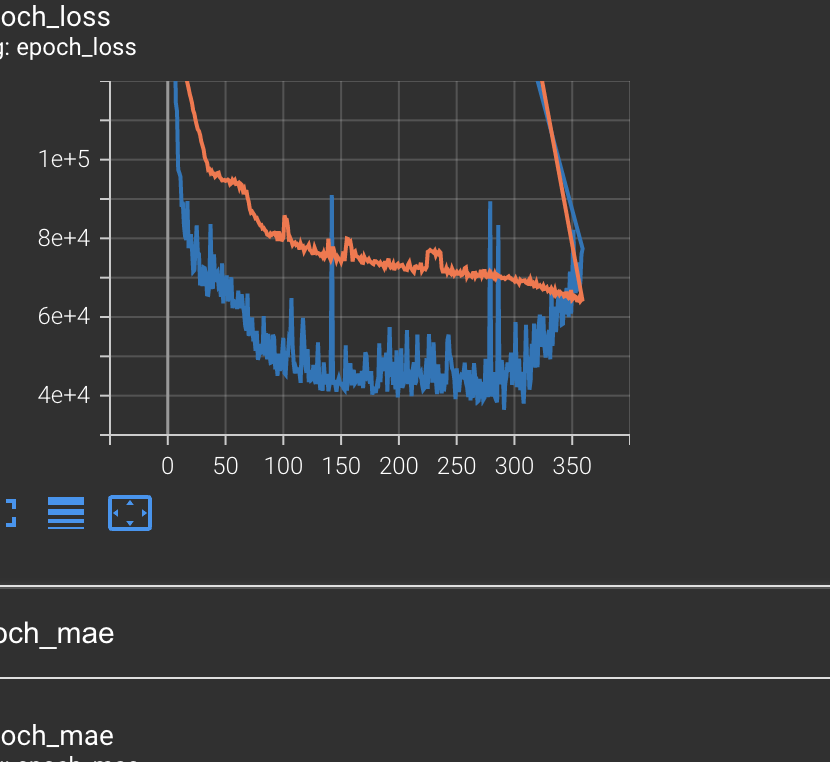

In [58]:

#TRAINING
tf.keras.backend.clear_session()

#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)


# define generator
n_features = 46


# model1.add(Dense(80), input_shape=(X_train.shape[1],), activation='relu'))
# model1.add(Dropout(0.5))
# model1.add(Dense(10, activation='relu'))

# model1.add(Dense(1, activation='linear'))


# self.model
model = Sequential()

# hidden layers


model.add(Dense(240, activation="relu", input_dim=X.shape[1]))


model.add(Dropout(0.2))


model.add(Dense(240, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(80, activation="relu"))
# output layer
model.add(Dense(1, activation="linear")
            )  # softmax for probability, #values are sigmoid


# Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# NN_model.summary()

# Configure the model and start training
model.compile(loss='huber', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['mae'],)

In [59]:
#FAST AI SEE IF TRIANING IMPROVES !


history=model.fit(X_train, y_train, epochs=500, batch_size=32,validation_split=0.2 ,verbose=1,callbacks=[tensorboard_callback],)


Epoch 1/500
4476/4476 [==============================] - 12s 2ms/step - loss: 645348.8125 - mae: 645349.3750 - val_loss: 470516.1562 - val_mae: 470516.8750
Epoch 2/500
4476/4476 [==============================] - 11s 2ms/step - loss: 479550.9062 - mae: 479551.2812 - val_loss: 467599.5625 - val_mae: 467600.2188
Epoch 3/500
4476/4476 [==============================] - 11s 2ms/step - loss: 476615.8438 - mae: 476616.1875 - val_loss: 465531.1875 - val_mae: 465531.5938
Epoch 4/500
4476/4476 [==============================] - 10s 2ms/step - loss: 473583.0625 - mae: 473583.6250 - val_loss: 459985.8750 - val_mae: 459986.5625
Epoch 5/500
4476/4476 [==============================] - 11s 2ms/step - loss: 467709.4688 - mae: 467710.0625 - val_loss: 453101.5938 - val_mae: 453102.1250
Epoch 6/500
4476/4476 [==============================] - 11s 2ms/step - loss: 459232.8438 - mae: 459233.3125 - val_loss: 442925.9062 - val_mae: 442926.3750
Epoch 7/500
4476/4476 [==============================] - 11s 2ms

4476/4476 [==============================] - 11s 2ms/step - loss: 103798.3750 - mae: 103798.9141 - val_loss: 80111.1484 - val_mae: 80111.6484
Epoch 54/500
4476/4476 [==============================] - 11s 2ms/step - loss: 103608.2734 - mae: 103608.7812 - val_loss: 79475.8828 - val_mae: 79476.4141
Epoch 55/500
4476/4476 [==============================] - 11s 3ms/step - loss: 102808.2969 - mae: 102808.8125 - val_loss: 78369.4141 - val_mae: 78369.9219
Epoch 56/500
4476/4476 [==============================] - 11s 2ms/step - loss: 102146.9453 - mae: 102147.4219 - val_loss: 77908.9688 - val_mae: 77909.5156
Epoch 57/500
4476/4476 [==============================] - 11s 2ms/step - loss: 101643.3125 - mae: 101643.8906 - val_loss: 77564.5859 - val_mae: 77565.1094
Epoch 58/500
4476/4476 [==============================] - 10s 2ms/step - loss: 100845.5391 - mae: 100846.0234 - val_loss: 75961.3125 - val_mae: 75961.7656
Epoch 59/500
4476/4476 [==============================] - 10s 2ms/step - loss: 9985

4476/4476 [==============================] - 11s 2ms/step - loss: 85124.4453 - mae: 85124.8984 - val_loss: 55793.5820 - val_mae: 55794.1250
Epoch 107/500
4476/4476 [==============================] - 11s 2ms/step - loss: 85148.8984 - mae: 85149.4062 - val_loss: 55207.5859 - val_mae: 55208.1211
Epoch 108/500
4476/4476 [==============================] - 11s 2ms/step - loss: 84916.9844 - mae: 84917.5547 - val_loss: 56228.5039 - val_mae: 56229.0078
Epoch 109/500
4476/4476 [==============================] - 11s 2ms/step - loss: 84581.8828 - mae: 84582.4297 - val_loss: 57103.6797 - val_mae: 57104.1797
Epoch 110/500
4476/4476 [==============================] - 10s 2ms/step - loss: 84557.6953 - mae: 84558.2422 - val_loss: 56998.4648 - val_mae: 56998.9727
Epoch 111/500
4476/4476 [==============================] - 11s 2ms/step - loss: 84508.1562 - mae: 84508.6797 - val_loss: 55033.7578 - val_mae: 55034.2891
Epoch 112/500
4476/4476 [==============================] - 11s 2ms/step - loss: 84411.2578

KeyboardInterrupt: 

In [66]:

#TRAINING
tf.keras.backend.clear_session()

#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)


# define generator
n_features = 46


# model1.add(Dense(80), input_shape=(X_train.shape[1],), activation='relu'))
# model1.add(Dropout(0.5))
# model1.add(Dense(10, activation='relu'))

# model1.add(Dense(1, activation='linear'))


# self.model
model = Sequential()

# hidden layers


model.add(Dense(120, activation="relu", input_dim=X.shape[1]))


model.add(Dropout(0.2))


model.add(Dense(120, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(40, activation="relu"))

model.add(Dense(40, activation="linear"))
# output layer
model.add(Dense(1, activation="linear")
            )  # softmax for probability, #values are sigmoid


# Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# NN_model.summary()

# Configure the model and start training
model.compile(loss='huber', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['mae'],)

In [67]:
#FAST AI SEE IF TRIANING IMPROVES !


history=model.fit(X_train, y_train, epochs=500, batch_size=32,validation_split=0.2 ,verbose=1,callbacks=[tensorboard_callback],)


Epoch 1/500
4476/4476 [==============================] - 12s 2ms/step - loss: 623596.5000 - mae: 623596.8125 - val_loss: 469925.2188 - val_mae: 469925.8125
Epoch 2/500
4476/4476 [==============================] - 11s 2ms/step - loss: 486934.6562 - mae: 486935.2188 - val_loss: 467327.1562 - val_mae: 467327.5625
Epoch 3/500
4476/4476 [==============================] - 11s 2ms/step - loss: 483212.2812 - mae: 483212.9375 - val_loss: 464588.7188 - val_mae: 464589.0938
Epoch 4/500
4476/4476 [==============================] - 10s 2ms/step - loss: 478852.4375 - mae: 478852.9062 - val_loss: 457041.7500 - val_mae: 457042.2188
Epoch 5/500
4476/4476 [==============================] - 10s 2ms/step - loss: 471297.3750 - mae: 471297.7188 - val_loss: 447042.8438 - val_mae: 447043.2500
Epoch 6/500
4476/4476 [==============================] - 11s 2ms/step - loss: 458000.1875 - mae: 458000.5938 - val_loss: 425933.0000 - val_mae: 425933.6562
Epoch 7/500
4476/4476 [==============================] - 11s 2ms

4476/4476 [==============================] - 11s 2ms/step - loss: 94256.5000 - mae: 94257.0781 - val_loss: 67874.8672 - val_mae: 67875.3438
Epoch 54/500
4476/4476 [==============================] - 10s 2ms/step - loss: 93480.2578 - mae: 93480.6875 - val_loss: 77227.3359 - val_mae: 77227.8203
Epoch 55/500
4476/4476 [==============================] - 11s 2ms/step - loss: 92419.3594 - mae: 92419.7969 - val_loss: 64082.3789 - val_mae: 64082.8711
Epoch 56/500
4476/4476 [==============================] - 11s 2ms/step - loss: 91589.5078 - mae: 91590.0469 - val_loss: 67812.8750 - val_mae: 67813.3594
Epoch 57/500
4476/4476 [==============================] - 11s 2ms/step - loss: 90879.3984 - mae: 90879.8984 - val_loss: 70723.3281 - val_mae: 70723.8203
Epoch 58/500
4476/4476 [==============================] - 11s 2ms/step - loss: 90504.9453 - mae: 90505.4375 - val_loss: 65648.7734 - val_mae: 65649.2969
Epoch 59/500
4476/4476 [==============================] - 11s 2ms/step - loss: 89657.8594 - mae

4476/4476 [==============================] - 11s 2ms/step - loss: 78288.1953 - mae: 78288.6250 - val_loss: 50635.7539 - val_mae: 50636.2031
Epoch 107/500
4476/4476 [==============================] - 11s 2ms/step - loss: 78055.6172 - mae: 78056.0781 - val_loss: 52273.7695 - val_mae: 52274.2812
Epoch 108/500
4476/4476 [==============================] - 11s 2ms/step - loss: 78418.0469 - mae: 78418.5625 - val_loss: 52143.0234 - val_mae: 52143.5742
Epoch 109/500
4476/4476 [==============================] - 11s 3ms/step - loss: 77974.1562 - mae: 77974.6875 - val_loss: 49166.5977 - val_mae: 49167.1094
Epoch 110/500
4476/4476 [==============================] - 11s 2ms/step - loss: 78052.8125 - mae: 78053.3594 - val_loss: 47729.4922 - val_mae: 47729.9883
Epoch 111/500
4476/4476 [==============================] - 11s 2ms/step - loss: 77707.7266 - mae: 77708.2812 - val_loss: 49459.0312 - val_mae: 49459.5703
Epoch 112/500
4476/4476 [==============================] - 11s 2ms/step - loss: 77682.5078

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



'/home/jose/FL_AM_Defect-Detection'

In [71]:
model.save(path+'MLP_REG_40',save_format='h5')

In [72]:
# loading the saved model
loaded_model = tf.keras.models.load_model(path+'MLP_REG_40')


In [73]:

def scheduler(epoch, lr):
      if epoch < 200:
        lr=0.000001
        return lr
      else:
        lr=0.000001
        return lr #* tf.math.exp(-0.1)
lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

            
# retraining the model
# loaded_model.fit(x_train, y_train, epochs = 100, validation_data = (x_test,y_test),verbose=1)
loaded_model.fit(X_train, y_train, epochs=100, batch_size=32,validation_split=0.2 ,verbose=1,callbacks=[tensorboard_callback≈],)

Epoch 1/100
4476/4476 [==============================] - 12s 2ms/step - loss: 64832.7852 - mae: 64833.3086 - val_loss: 36212.9414 - val_mae: 36213.4414 - lr: 1.0000e-06
Epoch 2/100
4476/4476 [==============================] - 11s 2ms/step - loss: 64102.9844 - mae: 64103.5000 - val_loss: 36727.6953 - val_mae: 36728.1641 - lr: 1.0000e-06
Epoch 3/100
4476/4476 [==============================] - 11s 2ms/step - loss: 64051.5664 - mae: 64052.0234 - val_loss: 36678.6445 - val_mae: 36679.1680 - lr: 1.0000e-06
Epoch 4/100
4476/4476 [==============================] - 11s 2ms/step - loss: 64241.9102 - mae: 64242.4453 - val_loss: 36694.6406 - val_mae: 36695.1211 - lr: 1.0000e-06
Epoch 5/100
4476/4476 [==============================] - 11s 2ms/step - loss: 64208.6094 - mae: 64209.1094 - val_loss: 36777.3477 - val_mae: 36777.8594 - lr: 1.0000e-06
Epoch 6/100
4476/4476 [==============================] - 11s 2ms/step - loss: 64074.5508 - mae: 64075.0508 - val_loss: 36793.6523 - val_mae: 36794.1523 - l

4476/4476 [==============================] - 12s 3ms/step - loss: 63875.9805 - mae: 63876.5117 - val_loss: 35848.5664 - val_mae: 35849.0273 - lr: 1.0000e-06
Epoch 50/100
4476/4476 [==============================] - 11s 3ms/step - loss: 63857.3164 - mae: 63857.7891 - val_loss: 36753.0078 - val_mae: 36753.5117 - lr: 1.0000e-06
Epoch 51/100
4476/4476 [==============================] - 10s 2ms/step - loss: 64013.3750 - mae: 64013.8633 - val_loss: 36668.3398 - val_mae: 36668.8281 - lr: 1.0000e-06
Epoch 52/100
4476/4476 [==============================] - 10s 2ms/step - loss: 64099.2656 - mae: 64099.7539 - val_loss: 36959.5742 - val_mae: 36960.0938 - lr: 1.0000e-06
Epoch 53/100
4476/4476 [==============================] - 11s 3ms/step - loss: 63835.4688 - mae: 63835.9688 - val_loss: 36147.6992 - val_mae: 36148.1641 - lr: 1.0000e-06
Epoch 54/100
4476/4476 [==============================] - 12s 3ms/step - loss: 63775.3125 - mae: 63775.7930 - val_loss: 36867.8672 - val_mae: 36868.3672 - lr: 1.00

KeyboardInterrupt: 

### Show feature importance

['Probe_3_RadialHorizontal_Kurtosis_g~g', 'Probe_6_BearingRadial_DerivedPeak_g', 'Probe_2_RadialVertical_Kurtosis_g~g', 'Probe_1_AxialDirection_DerivedPeak_g', 'Probe_6_BearingRadial_HighFrequency_grms', 'Probe_5_RadialHorizontal_TruePeak_g', 'Probe_3_RadialHorizontal_Peak~Peak_g', 'Probe_4_RadialVertical_HighFrequency_grms']


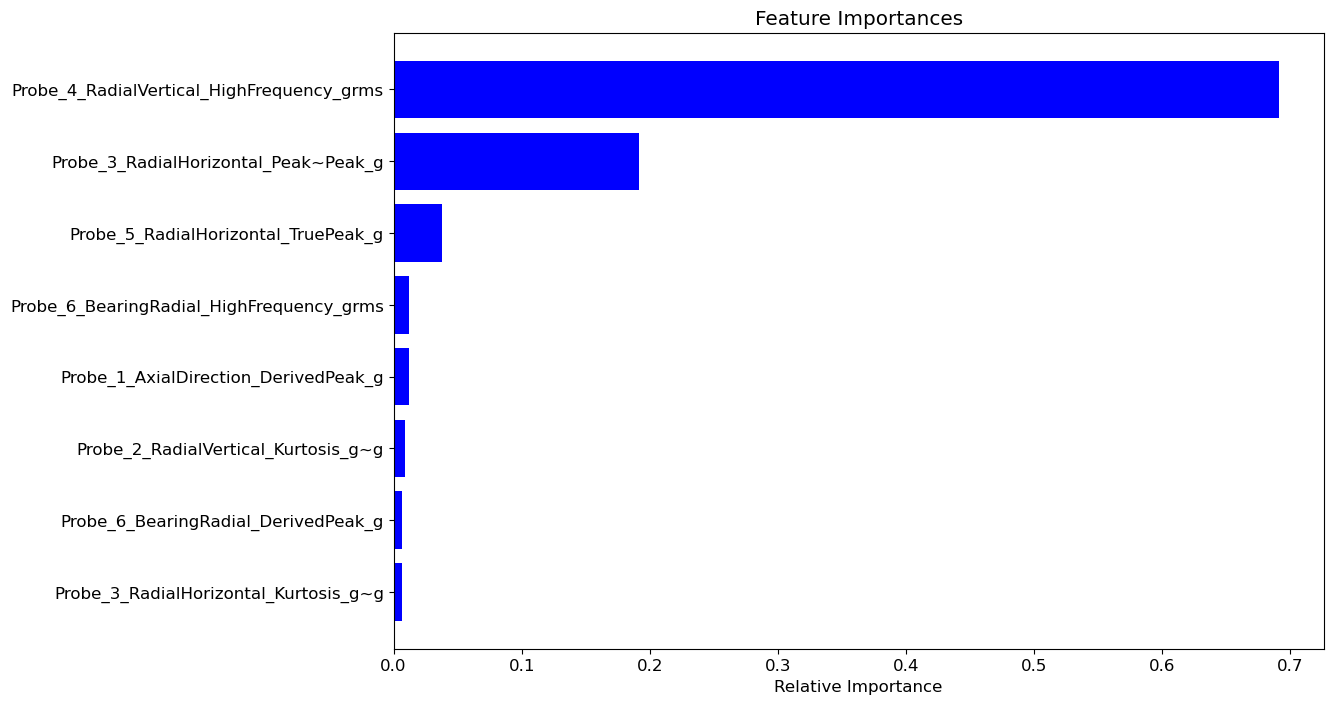

In [33]:
# RF: Get feature list
## Learn more: https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

features = list(X_test.columns)  

rf_imp_features = []

## Plot the feature importance
def plot_feature_importance ():
    importances = rf.feature_importances_
    
    indices = np.argsort(importances)[len(importances)-8:] ## top 25    

    plt.figure(figsize = (12,8))
    plt.rcParams['font.size'] = 12
    
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')

    features_y = []
    for x in indices:
        features_y.append(features[x])
    print(features_y)
    plt.yticks(range(len(indices)), features_y) 

    plt.xlabel('Relative Importance')
    plt.savefig(data_path + 'fi_offset_RUL.png') # save

    plt.show()
    return features_y

rf_imp_features = plot_feature_importance()


In [34]:
rf_imp_features

['Probe_3_RadialHorizontal_Kurtosis_g~g',
 'Probe_6_BearingRadial_DerivedPeak_g',
 'Probe_2_RadialVertical_Kurtosis_g~g',
 'Probe_1_AxialDirection_DerivedPeak_g',
 'Probe_6_BearingRadial_HighFrequency_grms',
 'Probe_5_RadialHorizontal_TruePeak_g',
 'Probe_3_RadialHorizontal_Peak~Peak_g',
 'Probe_4_RadialVertical_HighFrequency_grms']

### Prediction

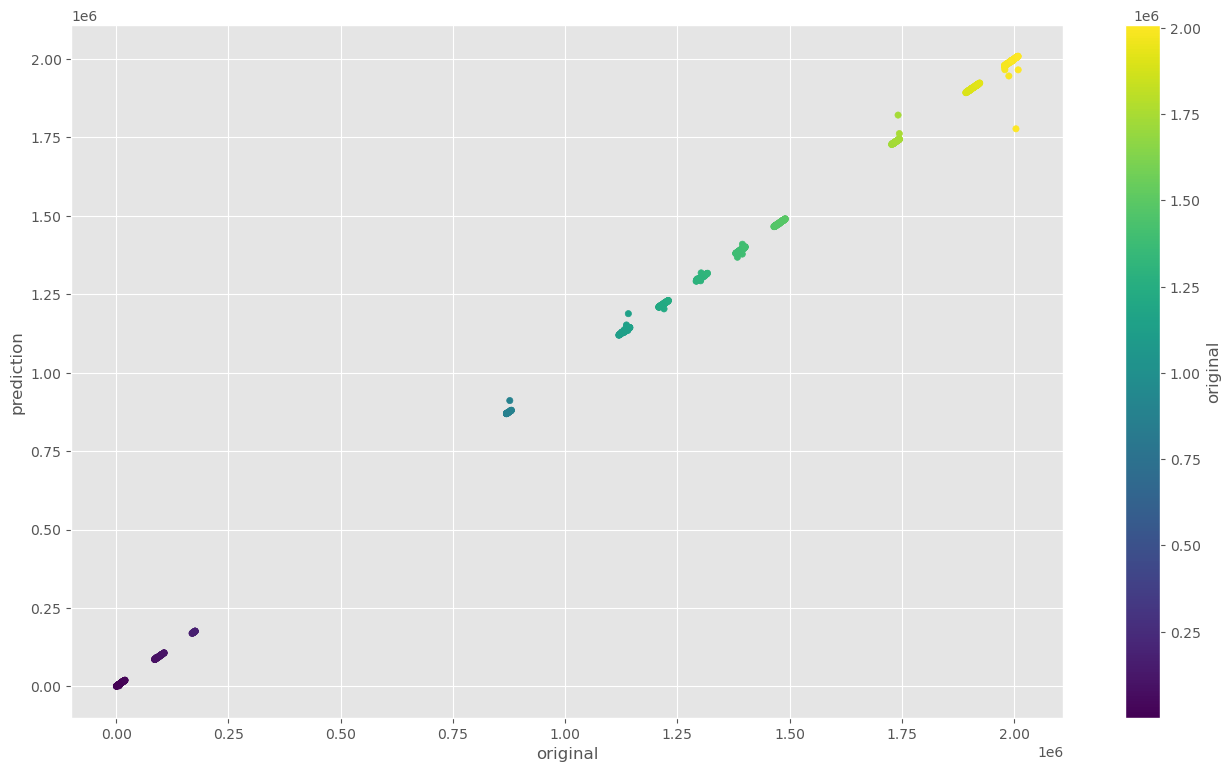

In [35]:
# get a random sample to verify the results!
## 
import matplotlib
import matplotlib.pyplot as plt
RNDSEED = np.random.seed(39)

dfs = df.sample(1000, random_state = RNDSEED) # data points
# print(dfs.rul)
X_dfs = dfs.drop('rul',axis = 1) # drop response

ys_pred = rf.predict(X_dfs)
# print(ys_pred)

rul = dfs[['rul']]
rul = rul.rename(columns={'rul': 'original'})
rul['prediction'] = ys_pred
# rul.head(5)

matplotlib.style.use('ggplot') ## styling

rul.plot.scatter(x='original', y='prediction', figsize=(16, 9), c='original', colormap='viridis') ## scatter

plt.savefig(path + 'offset_rul_prediction.png') # save


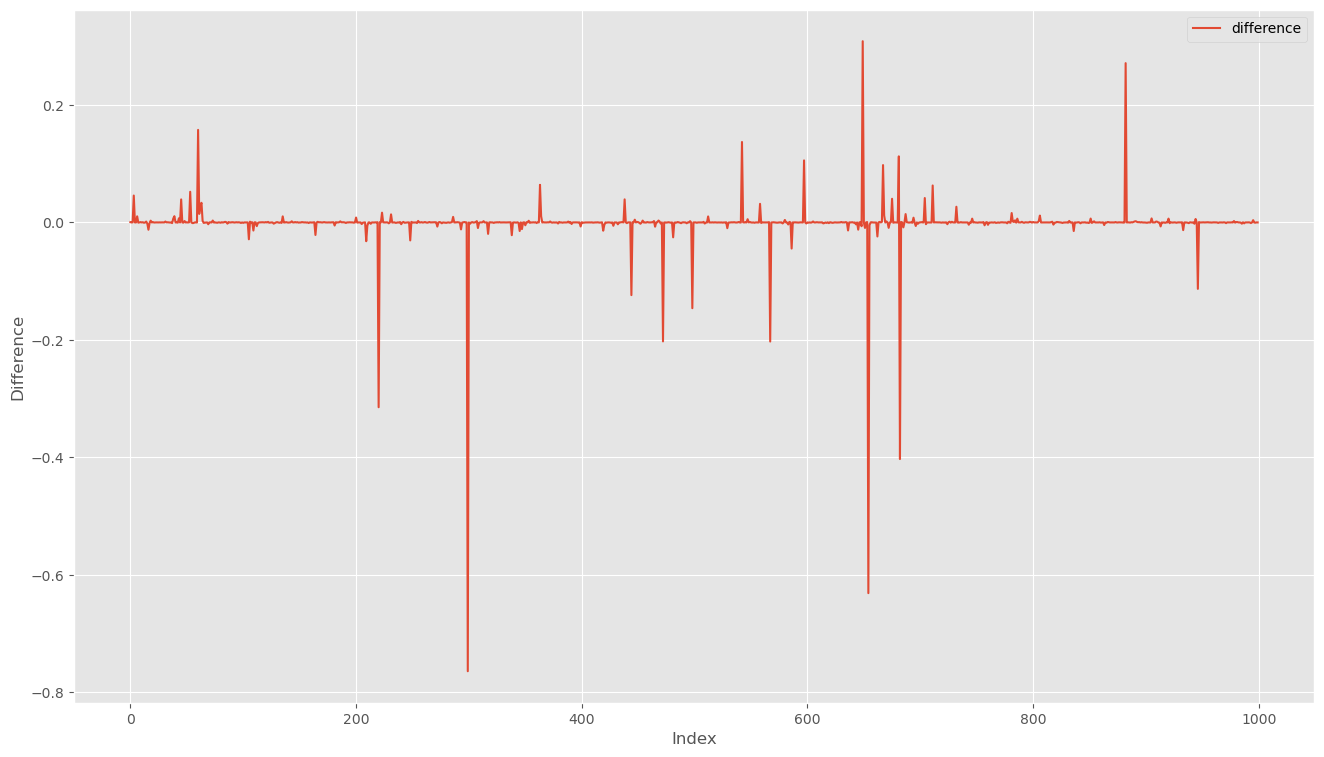

8


In [36]:
## Plot the % of deviation 

rul['difference'] = (rul['prediction'] - rul['original']) /  rul['original']

rul.index = range(len(rul.index)) ## reset index

ax = rul.plot( y=["difference"], figsize=(16, 9))

ax.set_xlabel("Index")
ax.set_ylabel("Difference")

plt.show()

# out of couriosity 
print(len(rul[(rul['difference'] > 0.2) | (rul['difference'] < -0.2)])) # how many more than 20%? # 8 only!

In [37]:
## styles
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [38]:
import pandas as pd
import os


STEPS_PER_BATCH=32
PRECISION = 4 # 3 of digits to keep after the decimal point
SEQUENCE_LENGHT=4
RUNNING_ON_COLAB = False # we assume running on CoLab! Change to False if running locally.

In [35]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation, Dense, Input
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
import tensorflow as tf


In [53]:
# ## true orignal ones
# # data split


# out_seq = np.array(y_test)#out_seq.reshape((len(out_seq), 1))
# # horizontally stack columns
# scaler = MinMaxScaler()
# X_vals=scaler.fit_transform(X_test)
# dataset = np.array(X_test)#hstack((in_seq1, in_seq2))

# pd.DataFrame(dataset)




# # shift the target sample by one step
# out_seq = np.insert(out_seq, 0, 0)
# #pre

# out_seq = np.delete(out_seq, -1)
# # define generator
# n_input = SEQUENCE_LENGHT #leght of the sequence timesteps
# testing_generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=STEPS_PER_BATCH)
# # print each sample
# # for i in range(len(testing_generator)):
# #     x, y = generator[i]
# #     print('%s => %s' % (x, y))



In [54]:

# out_seq = np.array(y_train)
# # horizontally stack columns

# dataset = np.array(X_train)

# X_train = scaler.fit_transform(X_train)

# # shift the target sample by one step
# out_seq = np.insert(out_seq, 0, 0)
# #pre
# out_seq = np.delete(out_seq, -1)
# # define generator
# n_input = SEQUENCE_LENGHT #leght of the sequence timesteps

# training_generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=STEPS_PER_BATCH)
X_train.shape[0]

179041

2023-05-08 12:09:54.528709: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 12:09:55.132082: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [43]:
# define generator
n_features = 46

# model = Sequential()
# # model.add(Conv1D(filters=120, kernel_size=2, activation='relu', input_shape=(n_input,n_features)))
# # model.add(Conv1D(filters=80, kernel_size=2, activation='relu'))
# # model.add(Dropout(0.5))
# # model.add(MaxPooling1D(pool_size=2))
# # model.add(Flatten())
# #model.add(Dense(80), activation='relu'))
# model.add(Dense(1,))

# model.compile(loss=tf.keras.losses.Huber(), optimizer = tf.keras.optimizers.SGD(), metrics =['mse','mae'])

# history = model.fit(training_generator,
#                                         steps_per_epoch=STEPS_PER_BATCH,
#                                         epochs=3000,
#                                         verbose=1,)
#                                         # callbacks=[tensorboard_callback],)#,es
#                                         #validation_data=validation_generator) # class_weight=class_weights)

model1 = Sequential()

model1.add(Dense(100, input_shape=(46,), activation='relu'))
model1.add(Dense(500, activation='relu'))
model1.add(Dense(1, activation='linear'))

# Configure the model and start training
model1.compile(loss='mae', optimizer='adam', metrics=['mae','mse'])


In [44]:
history=model1.fit(X_train, y_train, epochs=250, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/250


2023-05-27 17:31:18.500229: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f255c2aae30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-27 17:31:18.500761: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2023-05-27 17:31:18.506080: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-27 17:31:18.689907: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-27 17:31:19.259881: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4476/4476 [==============================] - 12s 2ms/step - loss: 527519.8125 - mae: 527519.8125 - mse: 512558661632.0000 - val_loss: 464934.1562 - val_mae: 464934.1562 - val_mse: 403603488768.0000
Epoch 2/250
4476/4476 [==============================] - 9s 2ms/step - loss: 460200.5938 - mae: 460200.5938 - mse: 400320167936.0000 - val_loss: 446213.3438 - val_mae: 446213.3438 - val_mse: 384756219904.0000
Epoch 3/250
4476/4476 [==============================] - 9s 2ms/step - loss: 420870.5625 - mae: 420870.5625 - mse: 360810905600.0000 - val_loss: 372171.9375 - val_mae: 372171.9375 - val_mse: 310067593216.0000
Epoch 4/250
4476/4476 [==============================] - 9s 2ms/step - loss: 301711.7812 - mae: 301711.7812 - mse: 266671915008.0000 - val_loss: 264634.5938 - val_mae: 264634.5938 - val_mse: 224858226688.0000
Epoch 5/250
4476/4476 [==============================] - 9s 2ms/step - loss: 261304.2188 - mae: 261304.2188 - mse: 219100053504.0000 - val_loss: 255594.1406 - val_mae: 255594.

KeyboardInterrupt: 

In [47]:
#!mkdir logs/fit/
!rm -rf logs/fit/*
# !sudo firewall-cmd  --add-port=8000/tcp

In [48]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10**-7 * 10**(epoch/3))

es=EarlyStopping(
    monitor="val_loss",

    patience=1,
    verbose=1,
    mode="auto",
    min_delta=0.001
)

# # checkpoint_filepath = "./tmp/checkpoint"
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
scaler = MinMaxScaler()



In [49]:
%load_ext tensorboard
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [50]:
A_X_train=np.array(X_train)
A_X_test=np.array(X_test)


In [51]:
sample_size = A_X_train.shape[0] # number of samples in train set
time_steps  = A_X_train.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = A_X_train.reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", A_X_train.shape)
print("1 Sample shape:\n",train_data_reshaped[0].shape)
print("An example sample:\n", train_data_reshaped[0])

After reshape train data set shape:
 (179041, 46)
1 Sample shape:
 (46, 1)
An example sample:
 [[3.16450e+00]
 [1.61500e-01]
 [7.10700e-01]
 [1.14200e-01]
 [3.61500e-01]
 [5.02000e-02]
 [2.59280e+00]
 [3.16280e+00]
 [4.02000e-01]
 [1.76860e+00]
 [2.84300e-01]
 [8.99100e-01]
 [2.81600e-01]
 [2.65970e+00]
 [2.46730e+00]
 [7.65500e-01]
 [2.53650e+00]
 [5.41300e-01]
 [1.33550e+00]
 [5.40400e-01]
 [2.31200e+00]
 [3.98880e+00]
 [2.27800e-01]
 [1.22600e+00]
 [1.61100e-01]
 [6.42500e-01]
 [1.02200e-01]
 [3.03810e+00]
 [2.61880e+00]
 [4.51900e-01]
 [1.62700e+00]
 [3.19600e-01]
 [8.36900e-01]
 [3.16300e-01]
 [2.13390e+00]
 [4.26050e+00]
 [1.85000e-02]
 [9.65000e-02]
 [1.31000e-02]
 [5.56000e-02]
 [4.60000e-03]
 [2.99350e+00]
 [7.36422e+01]
 [7.32496e+01]
 [7.34353e+01]
 [7.37359e+01]]


In [52]:
test_data_reshaped = np.array(A_X_test).reshape(A_X_test.shape[0],A_X_test.shape[1],1)

In [53]:
def build_conv1D_model():

    n_timesteps = train_data_reshaped.shape[1] #13
    n_features  = train_data_reshaped.shape[2] #1 
    model = Sequential(name="model_conv1D")
    model.add(Input(shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
    model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D"))
    model.add(Flatten())
    model.add(Dense(32, activation='relu', name="Dense_1"))
    model.add(Dense(n_features, name="Dense_2"))


    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
    return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 40, 64)            512       
                                                                 
 dropout_1 (Dropout)         (None, 40, 64)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 38, 32)            6176      
                                                                 
 Conv1D_3 (Conv1D)           (None, 37, 16)            1040      
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 18, 16)           0         
                                                                 
 flatten_1 (Flatten)         (None, 288)               0         
                                                                 
 Dense_1 (Dense)             (None, 32)               

In [54]:
X_train.columns

Index(['Probe_1_AxialDirection_CrestFactor_g~g',
       'Probe_1_AxialDirection_DerivedPeak_g',
       'Probe_1_AxialDirection_Peak~Peak_g', 'Probe_1_AxialDirection_RMS_g',
       'Probe_1_AxialDirection_TruePeak_g',
       'Probe_1_AxialDirection_HighFrequency_grms',
       'Probe_1_AxialDirection_Kurtosis_g~g',
       'Probe_2_RadialVertical_CrestFactor_g~g',
       'Probe_2_RadialVertical_DerivedPeak_g',
       'Probe_2_RadialVertical_Peak~Peak_g', 'Probe_2_RadialVertical_RMS_g',
       'Probe_2_RadialVertical_TruePeak_g',
       'Probe_2_RadialVertical_HighFrequency_grms',
       'Probe_2_RadialVertical_Kurtosis_g~g',
       'Probe_3_RadialHorizontal_CrestFactor_g~g',
       'Probe_3_RadialHorizontal_DerivedPeak_g',
       'Probe_3_RadialHorizontal_Peak~Peak_g',
       'Probe_3_RadialHorizontal_RMS_g', 'Probe_3_RadialHorizontal_TruePeak_g',
       'Probe_3_RadialHorizontal_HighFrequency_grms',
       'Probe_3_RadialHorizontal_Kurtosis_g~g',
       'Probe_4_RadialVertical_CrestFacto

In [55]:
history = model_conv1D.fit(train_data_reshaped,np.array(y_train),  epochs=500,
                    validation_split=0.2, verbose=1,callbacks=[tensorboard_callback,es])

Epoch 1/500
4476/4476 [==============================] - 13s 3ms/step - loss: 465928617984.0000 - mae: 522590.3750 - val_loss: 401407246336.0000 - val_mae: 473417.3125
Epoch 2/500
4476/4476 [==============================] - 12s 3ms/step - loss: 399761997824.0000 - mae: 490798.6562 - val_loss: 349004824576.0000 - val_mae: 445147.7812
Epoch 3/500
4476/4476 [==============================] - 12s 3ms/step - loss: 366144946176.0000 - mae: 478256.3438 - val_loss: 286399004672.0000 - val_mae: 424280.1875
Epoch 4/500
4476/4476 [==============================] - 12s 3ms/step - loss: 324751720448.0000 - mae: 448175.2188 - val_loss: 230354092032.0000 - val_mae: 370823.8438
Epoch 5/500
4476/4476 [==============================] - 12s 3ms/step - loss: 231417839616.0000 - mae: 372578.2812 - val_loss: 107822129152.0000 - val_mae: 242109.7812
Epoch 6/500
4476/4476 [==============================] - 12s 3ms/step - loss: 144134979584.0000 - mae: 289633.5938 - val_loss: 94724046848.0000 - val_mae: 22846

4476/4476 [==============================] - 11s 3ms/step - loss: 477918167040.0000 - mae: 86334.0156 - val_loss: 29847539712.0000 - val_mae: 69355.5312
Epoch 100/500
4476/4476 [==============================] - 11s 3ms/step - loss: 1084070232064.0000 - mae: 87001.5234 - val_loss: 35798904832.0000 - val_mae: 77619.8516
Epoch 101/500
4476/4476 [==============================] - 11s 2ms/step - loss: 487947010048.0000 - mae: 85521.1328 - val_loss: 31224829952.0000 - val_mae: 61176.3516
Epoch 102/500
4476/4476 [==============================] - 11s 2ms/step - loss: 487600816128.0000 - mae: 85290.0703 - val_loss: 32374999040.0000 - val_mae: 61473.8867
Epoch 103/500
4476/4476 [==============================] - 11s 3ms/step - loss: 850122244096.0000 - mae: 85939.7891 - val_loss: 32783443968.0000 - val_mae: 65554.3906
Epoch 104/500
4476/4476 [==============================] - 12s 3ms/step - loss: 650292690944.0000 - mae: 85762.5703 - val_loss: 36456341504.0000 - val_mae: 84524.2344
Epoch 105/5

# New code

In [73]:
os.chdir('..')

In [74]:
X_train

,Probe_1_AxialDirection_CrestFactor_g~g,Probe_1_AxialDirection_DerivedPeak_g,Probe_1_AxialDirection_Peak~Peak_g,Probe_1_AxialDirection_RMS_g,Probe_1_AxialDirection_TruePeak_g,Probe_1_AxialDirection_HighFrequency_grms,Probe_1_AxialDirection_Kurtosis_g~g,Probe_2_RadialVertical_CrestFactor_g~g,Probe_2_RadialVertical_DerivedPeak_g,Probe_2_RadialVertical_Peak~Peak_g,...,Probe_6_BearingRadial_DerivedPeak_g,Probe_6_BearingRadial_Peak~Peak_g,Probe_6_BearingRadial_RMS_g,Probe_6_BearingRadial_TruePeak_g,Probe_6_BearingRadial_HighFrequency_grms,Probe_6_BearingRadial_Kurtosis_g~g,Thermocouple 1_Value,Thermocouple 2_Value,Thermocouple 3_Value,Thermocouple 4_Value
198870,3.1645,0.1615,0.7107,0.1142,0.3615,0.0502,2.5928,3.1628,0.4020,1.7686,...,0.0185,0.0965,0.0131,0.0556,0.0046,2.9935,73.6422,73.2496,73.4353,73.7359
131703,2.8734,0.2231,0.8984,0.1577,0.4533,0.0557,2.3171,3.3820,0.4083,1.8823,...,0.0217,0.1335,0.0153,0.0807,0.0048,3.1651,73.9666,73.5732,73.6575,73.7733
118752,2.8543,0.2400,0.9247,0.1697,0.4844,0.0561,2.2305,3.0494,0.4185,1.7860,...,0.0219,0.1033,0.0155,0.0527,0.0052,2.7738,72.9677,72.6550,72.8152,73.1194
23063,3.0715,0.1358,0.5750,0.0960,0.2949,0.0255,2.5051,3.0292,0.4237,1.7696,...,0.0253,0.1461,0.0179,0.0938,0.0070,3.2156,72.5041,72.4811,72.4794,72.4657
39185,2.9225,0.1379,0.5661,0.0975,0.2850,0.0468,2.5263,3.2384,0.3893,1.7745,...,0.0217,0.1099,0.0153,0.0558,0.0056,3.0094,73.2162,72.9887,73.1915,73.7537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121748,2.7815,0.2483,0.9412,0.1756,0.4884,0.0556,2.1550,3.0191,0.4123,1.7532,...,0.0213,0.1192,0.0151,0.0607,0.0043,2.8287,72.9866,72.7071,72.8204,73.1791
164928,2.8846,0.1985,0.8018,0.1404,0.4050,0.0416,2.3776,2.9264,0.4389,1.7862,...,0.0226,0.1519,0.0160,0.0982,0.0074,3.2447,73.5716,73.7547,73.6346,73.6159
203817,2.9056,0.1493,0.5906,0.1056,0.3068,0.0497,2.4738,3.1811,0.4080,1.8312,...,0.0187,0.0940,0.0133,0.0536,0.0046,2.9598,73.4247,73.0950,73.2151,73.6930
221289,2.9897,0.1948,0.8012,0.1377,0.4118,0.0501,2.3208,3.1607,0.4008,1.7621,...,0.0193,0.1044,0.0136,0.0570,0.0044,3.1631,72.4883,72.1482,72.2905,72.7286


# UP To Here

In [64]:
#https://www.kaggle.com/code/kmat2019/u-net-1d-cnn-with-keras
!pwd

/home/jose/FL_AM_Defect-Detection


In [78]:
os.chdir('notebooks')

In [86]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	print(dataframe.head())# HERE I WAS TABIULAR DATA
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	print(X.shape)
	print("SHAPES")
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
	print(trainX.shape, trainy.shape)
	print("CHECKKK")
	print(trainX.shape)
	print(trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print("dsafdssdf")
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 1, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=1)
	return accuracy

# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	print(trainX)
	print(trainy)
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)

# run the experiment
run_experiment()
#CHECK SHAPE OF VECRTOR!
#https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

        0         1         2         3         4         5         6    \
0  1.012817  1.022833  1.022028  1.017877  1.023680  1.016974  1.017746   
1  1.018851  1.022380  1.020781  1.020218  1.021344  1.020522  1.019790   
2  1.023127  1.021882  1.019178  1.015861  1.012893  1.016451  1.020331   
3  1.017682  1.018149  1.019854  1.019880  1.019121  1.020479  1.020595   
4  1.019952  1.019616  1.020933  1.023061  1.022242  1.020867  1.021939   

        7         8         9    ...       118       119       120       121  \
0  1.019263  1.016417  1.020745  ...  1.020981  1.018065  1.019638  1.020017   
1  1.019216  1.018307  1.017996  ...  1.019291  1.019258  1.020736  1.020950   
2  1.020266  1.021759  1.018649  ...  1.020304  1.021516  1.019417  1.019312   
3  1.016340  1.010611  1.009013  ...  1.021295  1.022934  1.022183  1.021637   
4  1.022300  1.022302  1.022254  ...  1.022687  1.023670  1.019899  1.017381   

        122       123       124       125       126       127  
0  1

        0         1         2         3         4         5         6    \
0  0.022859  0.010316  0.013250  0.017751  0.002553  0.007725  0.004325   
1  0.012268  0.016150  0.015895  0.012671  0.008774  0.005685  0.006093   
2  0.002159 -0.000272  0.002631  0.003376  0.000057  0.001268 -0.001209   
3 -0.000873 -0.005482 -0.004678 -0.000221  0.001588  0.009021  0.020953   
4 -0.001574  0.000201 -0.000970 -0.000673 -0.000693 -0.002041 -0.000265   

        7         8         9    ...       118       119       120       121  \
0  0.010617  0.017189  0.010511  ... -0.006042 -0.006891 -0.004903  0.001354   
1  0.008383  0.011140  0.012406  ...  0.016544  0.018556  0.018173  0.018046   
2 -0.002290  0.000451 -0.000389  ... -0.003351 -0.002691 -0.000283  0.000404   
3  0.028212  0.028609  0.024456  ... -0.009409 -0.011208 -0.013223 -0.013121   
4 -0.000217 -0.001554 -0.000895  ...  0.012295  0.009031  0.009103  0.005473   

        122       123       124       125       126       127  
0  0

        0         1         2         3         4         5         6    \
0  0.531349  0.721069  0.520328  0.372625  0.414541  0.333328  0.278828   
1 -0.061374 -0.095364 -0.146450 -0.126174 -0.092850 -0.085435 -0.051600   
2 -0.060250 -0.051756 -0.050428 -0.047289 -0.045649 -0.046523 -0.046078   
3  0.003590  0.024609  0.022714 -0.005963 -0.039240 -0.064194 -0.058898   
4 -0.032427 -0.037960 -0.042714 -0.041178 -0.037085 -0.034132 -0.027526   

        7         8         9    ...       118       119       120       121  \
0  0.270581  0.071018  0.004640  ... -0.106632 -0.108275 -0.108308 -0.108405   
1 -0.007535  0.053288  0.162047  ... -0.037494 -0.041349 -0.039796 -0.033819   
2 -0.043316 -0.042571 -0.050085  ... -0.024245 -0.034927 -0.040215 -0.040923   
3 -0.034983 -0.017993 -0.002546  ... -0.011480 -0.008477 -0.003954  0.002396   
4 -0.020723 -0.020127 -0.021431  ... -0.036274 -0.035293 -0.018226  0.000560   

        122       123       124       125       126       127  
0 -0

KeyboardInterrupt: 